# **Метод k-ближайших соседей**

▶ k-Nearest Neighbor, kNN


*   Используется в задачах как классификации, так и регрессии
*   Входит в семейство алгоритмов обучения с учителем:
> Дан размеченный набор данных, состоящий из обучающих наблюдений $(x,y)$.  
> Требуется выявить зависимость между $x$ и $y$: определить функцию $f:X→Y$ так, чтобы по наблюдению $x$ функция $f(x)$ могла наиболее достоверно предсказать целевое значение $y$.

---


В условиях **классификации** алгоритм kNN по существу сводится к **формированию большинства голосов между k экземплярами** (*данными наблюдений, использованных при обучении*), наиболее похожими на вновь рассматриваемое «невидимое» (*не используемое при обучении*) наблюдение.  
Сходство определяется в соответствии с **метрикой расстояния** между двумя точками данных.

Пусть $x_i$ - экземпляр наблюдения с $p$ параметрами (*характеристиками, "фичами"*):  

$$x_i = (x_{i1}, x_{i2},..., x_{ip})$$

$n$ - общее число наблюдений: $$i = (1, 2, ..., n)$$

**Евклидово расстояние** между наблюдениями $x_i$ и $x_l$ :

$$d(x_i, x_l) = \sqrt{(x_{i1} - x_{l1})^2 + (x_{i2} - x_{l2})^2 + ... +  (x_{ip} - x_{lp})^2 }$$

$$d(x_i, x_l) = \sqrt{\sum_{j=1}^{p}(x_{ij} - x_{lj})^2}$$


---



🔎***Альтернативные метрики расстояния***:

*   **Манхэттенское расстояние** (расстояние Городских кварталов):
$$d(x_i, x_l) = \sum_{j=1}^{p}|x_{ij} - x_{lj}|$$
*   **Расстояние Чебышева** (максимальное расстояние):
$$d(x_i, x_l) = \max_{j}|x_{ij} - x_{lj}|$$
*   **Расстояние Хэмминга** (для бинарных векторов длины p):
$$d(x_i, x_l) = \sum_{j=1}^{p}(x_{ij} \oplus x_{lj})$$
где ⊕ - операция побитового XOR

# **Алгоритм для классификации**


1.   Выбрать число соседей $k$ и метрику расстояния для определения дистанции между наблюдениями $D(x_i, x_l) = distance(x_i, x_l)$.
2.   Для нового наблюдения $x_i$ отобрать $k$ ближайших соседей согласно метрике расстояния.
3.   Среди отобранных наблюдений рассчитать число объектов в каждом классе.
4.   Класс, в котором оказалось наибольшее число соседей, назначается для рассматриваемого наблюдения.

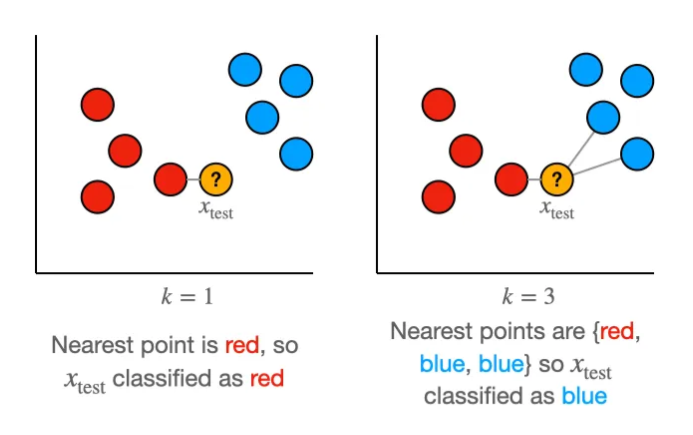

Если среди $k$ соседей окажется равное количество экземпляров, принадлежащих разным классам, то возникает неоднозначность в определении класса для нового экземпляра.

В таком случае **kNN** может применять различные стратегии для разрешения этой неоднозначности, например:


*   **Случайный выбор**
> В случае равного количества соседей для разных классов, можно случайным образом выбрать один из классов из набора классов с наибольшим количеством соседей.
*   **Взвешенное голосование**  
> Можно применить взвешенное голосование, где каждый сосед имеет вес, зависящий, например, от расстояния до нового экземпляра. Это означает, что ближайшие соседи могут иметь больший вес при определении класса.
---






**Как оценить результаты: Точность (Accuracy)**  
>**Смысл**: Доля правильных предсказаний (верно классифицированных объектов) среди всех предсказаний.  

$$\text{Accuracy} = \frac{\text{число правильных предсказаний}}{\text{общее число предсказаний}}
= \frac{\sum_{i=1}^{N} \mathbf{1}\{y_i = \hat{y}_i\}}{N}$$

# **Алгоритм для регрессии**


1.   Выбрать число соседей $k$ и метрику расстояния для определения дистанции между наблюдениями $D(x_i, x_l) = distance(x_i, x_l)$.
2.   Для нового наблюдения $x_i$ отобрать $k$ ближайших соседей согласно метрике расстояния.
3.   Прогнозирование целевого значения $y_i$ осуществляется путем усреднения (или взвешивания) значений целевой переменной для $k$ ближайших соседей:
$$\hat{y} = \frac{1}{k} \sum_{neighbor=1}^{k} y_{neighbor}$$

# **Классификация**

### **Датасет**
Датасет **Iris** - это набор данных, часто используемый в машинном обучении и статистике. Он содержит информацию о 150 образцах ирисов, по 50 образцов из каждого из трех видов ирисов:

* Ирис щетинистый (Iris setosa)
* Ирис версиколор (Iris versicolor)
* Ирис виргинский (Iris virginica)  

Каждый образец ириса измеряется по четырем характеристикам (признакам):

* Длина чашелистника (sepal length) в сантиметрах.
* Ширина чашелистника (sepal width) в сантиметрах.
* Длина лепестка (petal length) в сантиметрах.
* Ширина лепестка (petal width) в сантиметрах.  

Датасет Iris часто используется для задач классификации и кластеризации, а также в учебных целях для демонстрации различных методов машинного обучения.

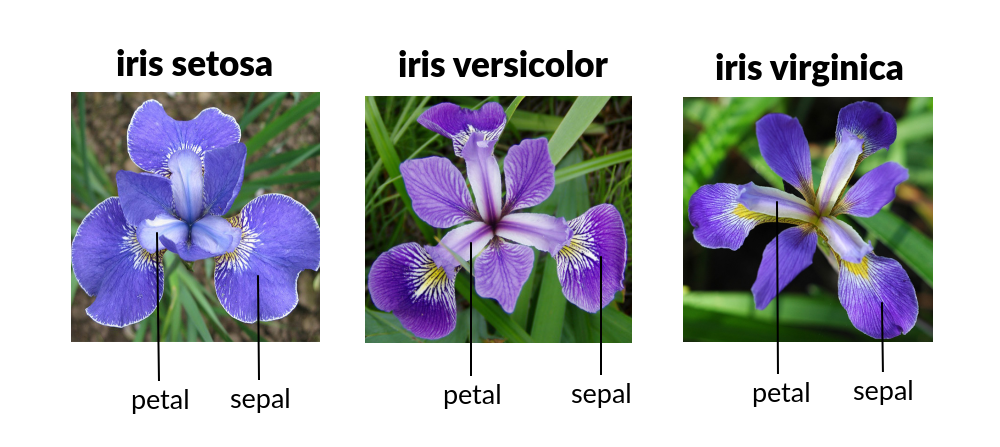


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score

### 1. Загрузка данных и разбиение

In [ ]:
# Загружаем данные
X, y = load_iris(return_X_y=True, as_frame=True)

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=0)

print("Размеры:", X_train.shape, X_test.shape)

Размеры: (112, 4) (38, 4)


In [ ]:
X

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
np.unique(y)

array([0, 1, 2])

### 2. Функция для вычисления расстояний

In [ ]:
def euclidean_distance(x1, x2):
    """
    Евклидово расстояние между двумя векторами
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

### 3. Поиск ближайших соседей

In [ ]:
def get_neighbors(X_train, y_train, x_test, k):
    """
    Находим k ближайших соседей для одного примера x_test
    """
    distances = []
    for i, x_train in enumerate(X_train):
        dist = euclidean_distance(x_test, x_train)
        distances.append((dist, y_train[i]))

    # сортируем по расстоянию и выбираем k первых
    distances.sort(key=lambda x: x[0])
    neighbors = [label for (_, label) in distances[:k]]
    return neighbors

### 4. Голосование соседей

In [ ]:
def predict_one(X_train, y_train, x_test, k):
    neighbors = get_neighbors(X_train, y_train, x_test, k)
    # считаем, какая метка встречается чаще
    most_common = Counter(neighbors).most_common(1)
    return most_common[0][0]

### 5. Предсказание для выборки

In [ ]:
def predict_knn(X_train, y_train, X_test, k):
    predictions = []
    for x in X_test:
        pred = predict_one(X_train, y_train, x, k)
        predictions.append(pred)
    return np.array(predictions)

### ✍ Пошаговая демонстрация на одном примере

In [ ]:
# Выбираем первый тестовый пример
x_example = X_test[0]
true_label = y_test[0]

print("Фичи тестового примера:", x_example)
print("Истинная метка:", true_label)

Фичи тестового примера: [5.8 2.8 5.1 2.4]
Истинная метка: 2


In [ ]:
print("Вычисляем расстояния до всех объектов обучающей выборки")

# Собираем (dist, label, index)
distances = []
for i, x_tr in enumerate(X_train):
    d = euclidean_distance(x_example, x_tr)
    distances.append((d, int(y_train[i]), i))
distances.sort(key=lambda x: x[0])  # сортируем по возрастанию расстояния

Вычисляем расстояния до всех объектов обучающей выборки


In [ ]:
show_top = 10

print(f"\n{show_top} ближайших (dist, label, train_index):")
for d, label, idx in distances[:show_top]:
  print(f"  index={idx:3d}  dist={d: .4f}   label={label}")


10 ближайших (dist, label, train_index):
  index= 24  dist= 0.5099   label=2
  index= 99  dist= 0.5099   label=2
  index= 56  dist= 0.5196   label=2
  index= 38  dist= 0.6403   label=2
  index= 81  dist= 0.7280   label=2
  index= 92  dist= 0.7550   label=2
  index= 19  dist= 0.7746   label=2
  index=103  dist= 0.7874   label=1
  index= 54  dist= 0.7874   label=2
  index= 16  dist= 0.8124   label=2


In [ ]:
# Используем функцию get_neighbors для получения меток соседей

k = 5

neighbors_labels = get_neighbors(X_train, y_train, x_example, k=k)
print(f"Метки {k} ближайших соседей (get_neighbors):", neighbors_labels)

Метки 5 ближайших соседей (get_neighbors): [np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2)]


In [ ]:
# Подсчёт голосов
vote_counts = Counter(neighbors_labels)
print("Подсчёт голосов соседей:", vote_counts)

Подсчёт голосов соседей: Counter({np.int64(2): 5})


In [ ]:
# Итоговый ответ
max_votes = max(vote_counts.values())
prediction = [label for label, cnt in vote_counts.items() if cnt == max_votes]
prediction

[np.int64(2)]

In [ ]:
# Предсказание при помощи функции
func_prediction = predict_one(X_train, y_train, x_example, 5)
func_prediction

np.int64(2)

### ✍ Поэкспериментируем со значением k

In [ ]:
import time

for k in [1, 3, 5, 7, 10, 13, 15, 50, 100]:
    start = time.time()
    y_pred = predict_knn(X_train, y_train, X_test, k=k)
    acc = accuracy_score(y_test, y_pred)
    end = time.time()
    elapsed = end - start
    print(f"k={k}: accuracy = {acc:.3f}, время выполнения = {elapsed:.6f} сек")


k=1: accuracy = 0.974, время выполнения = 0.055698 сек
k=3: accuracy = 0.974, время выполнения = 0.032783 сек
k=5: accuracy = 0.974, время выполнения = 0.043865 сек
k=7: accuracy = 0.974, время выполнения = 0.038435 сек
k=10: accuracy = 0.974, время выполнения = 0.038465 сек
k=13: accuracy = 0.974, время выполнения = 0.043089 сек
k=15: accuracy = 0.974, время выполнения = 0.035615 сек
k=50: accuracy = 0.895, время выполнения = 0.062582 сек
k=100: accuracy = 0.605, время выполнения = 0.073137 сек


In [ ]:
# Равномерно распределяем значения k от 1 до 100 (например, 15 точек)
k_values = np.linspace(1, 100, 15, dtype=int)
k_values = np.unique(k_values)

accuracies = []
times = []

for k in k_values:
    start = time.time()
    y_pred = predict_knn(X_train, y_train, X_test, k=k)
    acc = accuracy_score(y_test, y_pred)
    end = time.time()
    accuracies.append(acc)
    times.append(end - start)

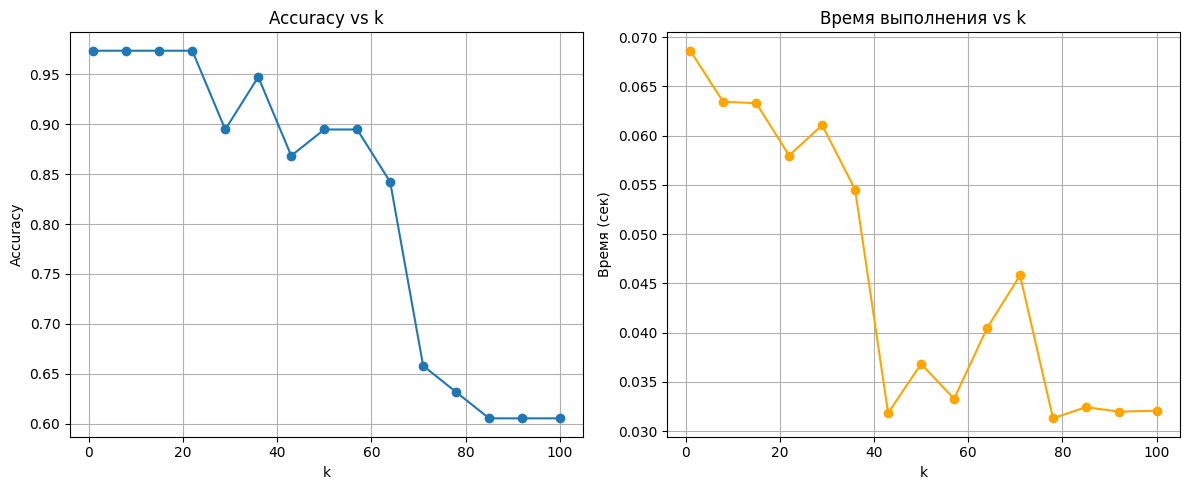

In [ ]:
# Графики
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, times, marker='o', color='orange')
plt.title("Время выполнения vs k")
plt.xlabel("k")
plt.ylabel("Время (сек)")
plt.grid(True)

plt.tight_layout()
plt.show()

-----------------------

# **k-NN в sklearn**

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier

## **Модель для классификации**

In [ ]:
X1, y1 = load_iris(return_X_y=True, as_frame=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values, y1.values, random_state=0)
print(X1, y1, sep='\n')

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [ ]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

sk KNN classifier accuracy: 0.9736842105263158
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


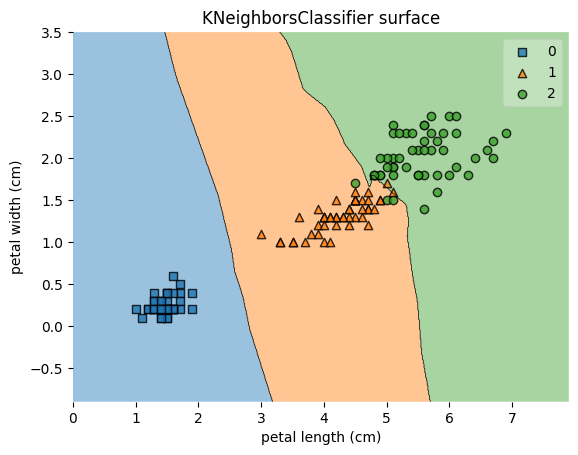

In [ ]:
# KNN classifier (scikit-learn)


sk_knn_clf = KNeighborsClassifier()
sk_knn_clf.fit(X1_train, y1_train)
sk_knn_clf_pred_res = sk_knn_clf.predict(X1_test)
sk_knn_clf_accuracy = accuracy_score(y1_test, sk_knn_clf_pred_res)

print(f'sk KNN classifier accuracy: {sk_knn_clf_accuracy:}')
print(sk_knn_clf_pred_res)

feature_indexes = [2, 3]
title1 = 'KNeighborsClassifier surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_knn_clf, feature_indexes, title1)

# **Алгоритм для регрессии**


1.   Выбрать число соседей $k$ и метрику расстояния для определения дистанции между наблюдениями $D(x_i, x_l) = distance(x_i, x_l)$.
2.   Для нового наблюдения $x_i$ отобрать $k$ ближайших соседей согласно метрике расстояния.
3.   Прогнозирование целевого значения $y_i$ осуществляется путем усреднения (или взвешивания) значений целевой переменной для $k$ ближайших соседей:
$$\hat{y} = \frac{1}{k} \sum_{neighbor=1}^{k} y_{neighbor}$$





In [ ]:
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X2, y2 = load_diabetes(return_X_y=True, as_frame=True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2.values, y2.values, random_state=0)
print(X2, y2, sep='\n')

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [ ]:
sk_knn_reg = KNeighborsRegressor()
sk_knn_reg.fit(X2_train, y2_train)
sk_knn_reg_pred_res = sk_knn_reg.predict(X2_test)
sk_knn_reg_r2 = r2_score(y2_test, sk_knn_reg_pred_res)

print(f'sk KNN regressor R2 score: {sk_knn_reg_r2}')
print(sk_knn_reg_pred_res)

sk KNN regressor R2 score: 0.18912404854026388
[253.6 188.6 183.2 138.4 177.8 189.6 111.8 229.  178.  266.8 147.6 193.8
 136.4  55.6 297.4  73.6  97.2  83.8 130.8 214.4 173.6 115.2 167.4 101.
 186.8 175.6  97.2  75.  172.4 144.2 205.4  63.8 161.6 190.8 110.2 159.2
 199.4 141.2 121.4 140.8 155.6 173.8 140.6 175.6 134.2  84.6 110.4 127.2
 107.4 209.2 130.2  78.2 183.6 105.  227.4 160.4 155.  104.6 119.2 175.8
 159.8 141.6 150.4 100.2 279.2 128.4  91.2 269.2 183.2  88.4 118.  151.6
  74.8  97.8 126.2 140.4 127.4 223.6 236.6 191.2 111.6 219.8  69.6 169.4
  87.6  92.6 112.  145.8 117.  153.2 115.2  92.8  67.6 172.   92.4 106.6
 208.4 173.8 113.2 104.4 141.6 128.2 226.   87.  247.6 147.6 223.6 217.2
 149.   72.6 182. ]
